# <font color = 'pink'><b>Employee Attrition Analysis</b></font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('D:\Python work\Data Analysis Projects\Employee Attrition\Attrition data.csv')

In [4]:
df.sample(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
2525,2526,29,Yes,Travel_Rarely,Research & Development,8,2,Medical,1,Male,1,Manager,Divorced,28530,4.0,Y,14,8,1,4.0,5,2,2,0,1.0,1.0,3.0,2,3
2687,2688,32,No,Travel_Frequently,Research & Development,9,2,Medical,1,Female,2,Research Scientist,Single,35000,0.0,Y,16,8,1,8.0,2,7,3,6,4.0,4.0,2.0,2,3
1656,1657,48,No,Travel_Rarely,Research & Development,6,3,Medical,1,Male,1,Laboratory Technician,Married,108540,2.0,Y,14,8,1,14.0,6,9,6,7,2.0,4.0,3.0,3,3
3096,3097,24,Yes,Travel_Rarely,Research & Development,27,2,Medical,1,Male,1,Research Scientist,Single,104220,1.0,Y,17,8,1,6.0,0,5,1,4,1.0,2.0,3.0,2,3
3808,3809,50,No,Travel_Rarely,Research & Development,4,2,Medical,1,Female,1,Laboratory Technician,Married,27990,4.0,Y,12,8,1,27.0,0,1,0,0,3.0,3.0,3.0,1,3


In [5]:
df.shape

(4410, 29)

In [6]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

## <font color = 'lightpink'><b>Data Preprocessing</b></font>

In [7]:
# After checking the dataset i found that i can fill the missing values with the most frequent value in the column
# df.NumCompaniesWorked.value_counts() # mostfrequent
# df.EnvironmentSatisfaction.value_counts() # mostfrequent
# df.JobSatisfaction.value_counts() # mostfrequent
# df.WorkLifeBalance.value_counts() # mostfrequent

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp = SimpleImputer(strategy='most_frequent')

In [10]:
df['NumCompaniesWorked'] = imp.fit_transform(df[['NumCompaniesWorked']])
df['EnvironmentSatisfaction'] = imp.fit_transform(df[['EnvironmentSatisfaction']])
df['JobSatisfaction'] = imp.fit_transform(df[['JobSatisfaction']])
df['WorkLifeBalance'] = imp.fit_transform(df[['WorkLifeBalance']])

In [11]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

Now we have successfully filled the missing values of each columns with the appropriate values in this they all are the most frequent values of each column.  

In [12]:
df.sample(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
3882,3883,44,No,Travel_Rarely,Research & Development,9,3,Technical Degree,1,Female,3,Healthcare Representative,Divorced,68610,4.0,Y,12,8,0,8.0,2,2,2,2,3.0,4.0,3.0,2,3
437,438,37,Yes,Travel_Rarely,Sales,10,4,Marketing,1,Female,3,Human Resources,Married,30720,5.0,Y,14,8,0,17.0,3,14,11,7,1.0,3.0,1.0,2,3
2360,2361,39,No,Travel_Rarely,Research & Development,6,2,Life Sciences,1,Male,3,Research Scientist,Married,106090,2.0,Y,17,8,1,10.0,2,7,7,7,2.0,1.0,3.0,3,3
729,730,51,No,Travel_Frequently,Research & Development,20,3,Medical,1,Male,2,Sales Executive,Married,148140,2.0,Y,11,8,1,14.0,2,4,3,2,2.0,2.0,3.0,2,3
1653,1654,42,No,Travel_Frequently,Research & Development,2,4,Medical,1,Female,1,Research Scientist,Married,29770,4.0,Y,15,8,3,8.0,3,2,2,0,2.0,3.0,3.0,2,3


In [13]:
X = df[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating']]
y = df[['Attrition']]

## <font color = 'lightpink'><b>Visualizaiton</b></font>

Text(0, 0.5, 'Age')

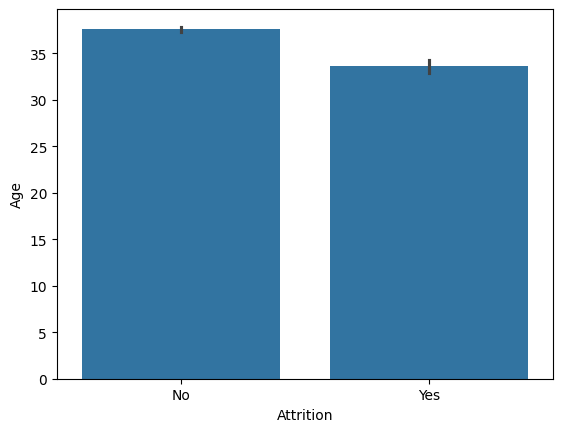

In [14]:
# Age vs Attrition
sns.barplot(x='Attrition', y='Age', data=df)
plt.xlabel('Attrition')
plt.ylabel('Age')

Text(0, 0.5, 'Count')

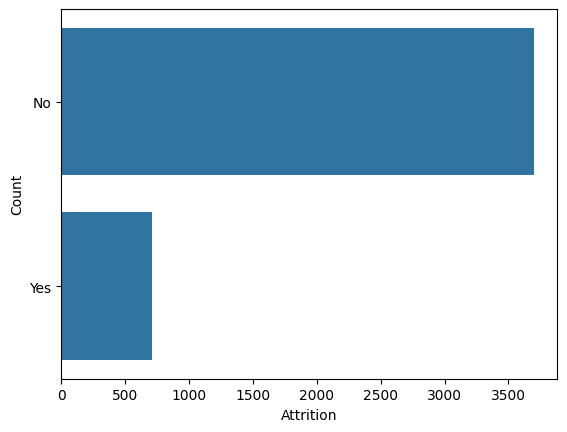

In [15]:
# overall attrition rate
sns.countplot(df['Attrition'])
plt.xlabel('Attrition')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

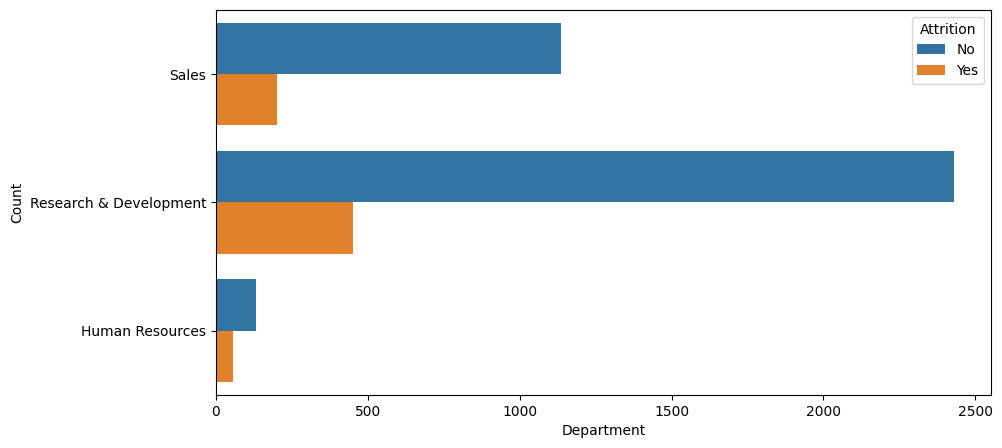

In [16]:
# Attrition rate by Department
plt.figure(figsize=(10, 5))
sns.countplot(y = 'Department', hue='Attrition', data = df)
plt.xlabel('Department')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

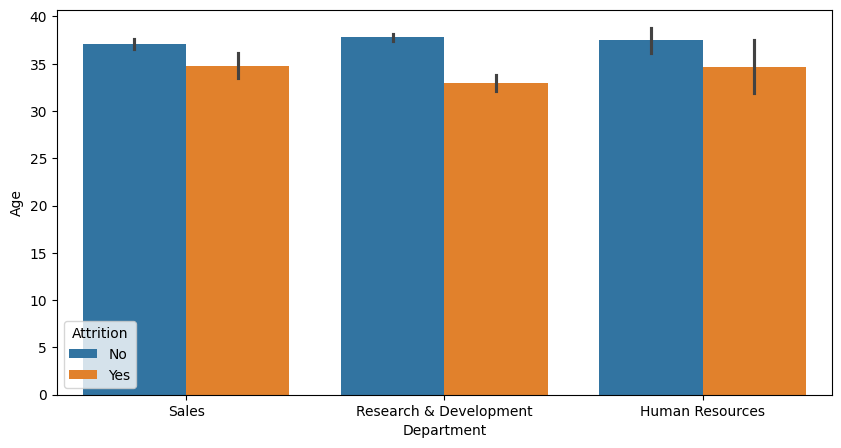

In [17]:
# Attrition by age and Department
plt.figure(figsize=(10, 5))
sns.barplot(x='Department', y='Age', hue='Attrition', data=df)
plt.xlabel('Department')
plt.ylabel('Age')

Text(0, 0.5, 'Count')

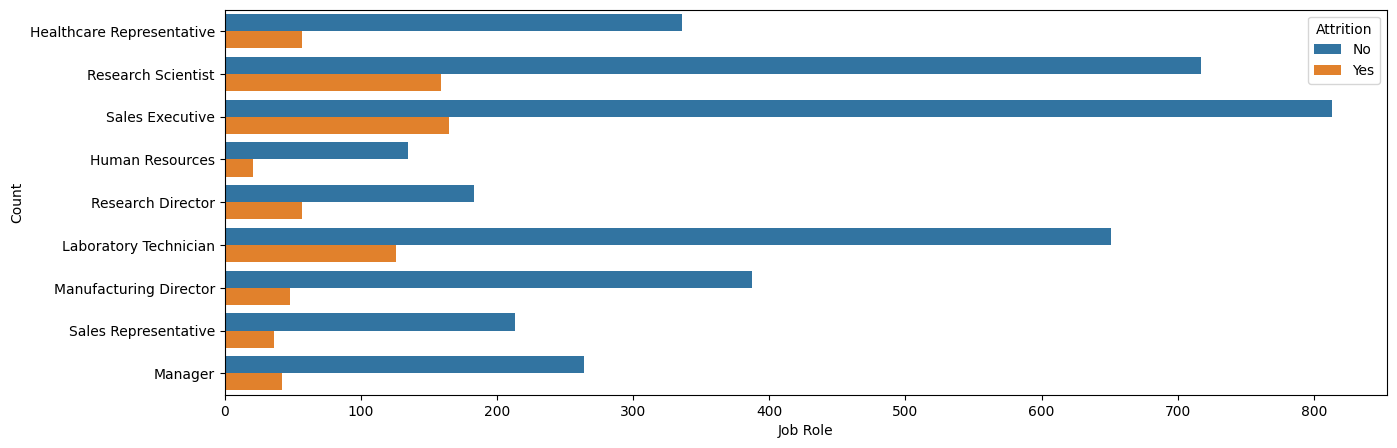

In [18]:
# Attrition rate by jobrole
plt.figure(figsize=(15, 5))
sns.countplot(y = 'JobRole', hue='Attrition', data = df)
plt.xlabel('Job Role')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

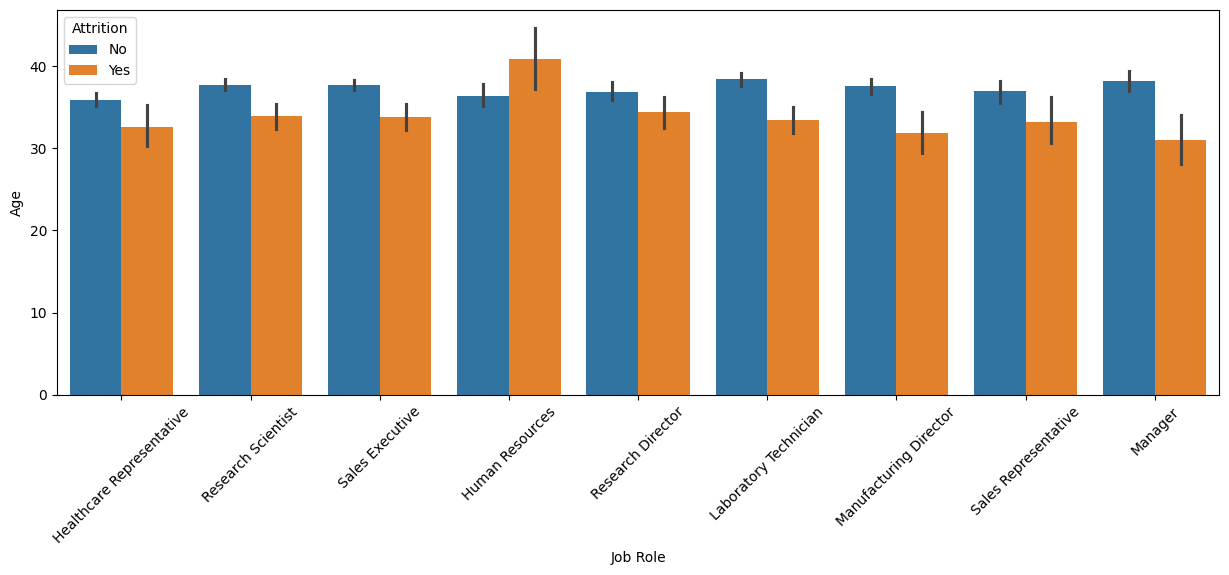

In [19]:
# Attrition by age and job role
plt.figure(figsize=(15, 5))
sns.barplot(x='JobRole', y='Age', hue='Attrition', data=df)
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.ylabel('Age')

<Axes: xlabel='Gender', ylabel='count'>

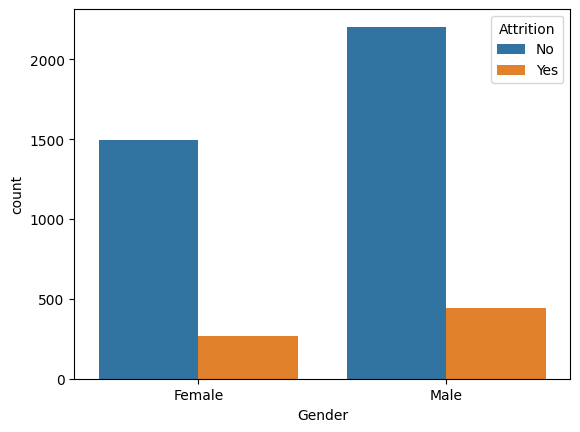

In [26]:
# Attrition by Gender 
sns.countplot(x = 'Gender', hue='Attrition', data = df)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

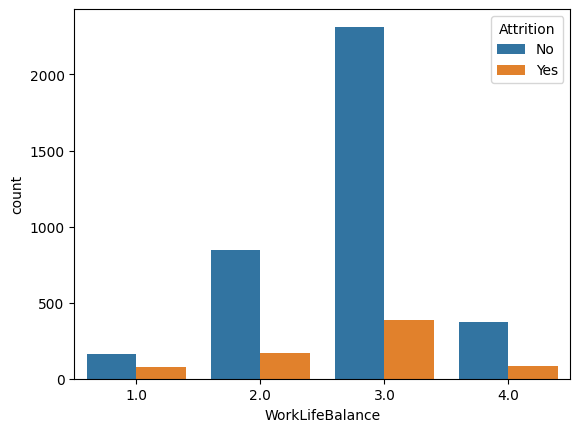

In [27]:
# Attrition by work life balance
sns.countplot(x = 'WorkLifeBalance', hue='Attrition', data = df)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

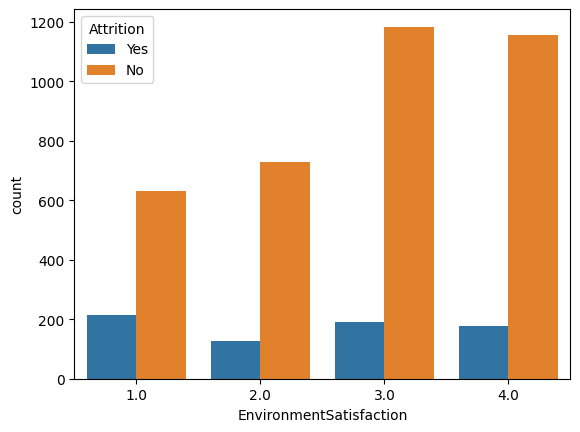

In [28]:
# Attrition by Environment Satisfaction
sns.countplot(x = 'EnvironmentSatisfaction', hue='Attrition', data = df)

## <font color = 'lightpink'><b>Performance and Satisfaction</b></font>

<Axes: xlabel='PerformanceRating', ylabel='count'>

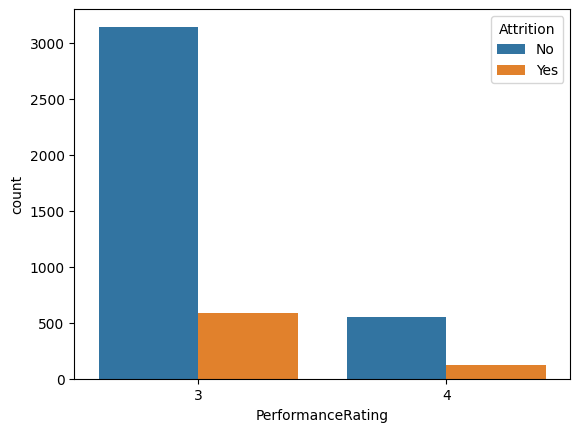

In [29]:
# Attrition rate by performance rating
sns.countplot(x = 'PerformanceRating', hue='Attrition', data = df)
